## <center>Prueba Tecnica</center>
#### <center>Autor:</center>
##### <center>Sebastian Carvalho Salazar:</center>

# Analisis de Datos

## Librerias


In [88]:
#!pip install yellowbrick

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

## Importación de Datos

In [90]:
df_aux = pd.read_excel('..//in//Datos_EDA.xlsx', index_col=0)
df = pd.read_excel('..//in//Datos_EDA_IMP.xlsx', index_col=0)

## Analisis por agrupaciones

### Persistencia

Los datos muestran que la persistencia en el tratamiento ARV parece estar correlacionada con el éxito del tratamiento. El número de casos exitosos es significativamente mayor en el grupo con persistencia de 4-8, en comparación con el grupo con persistencia de 0-4. Esto sugiere que es importante para los pacientes mantener una alta persistencia en el tratamiento para lograr un resultado exitoso. Sin embargo, también es importante tener en cuenta que la persistencia no es la única variable que afecta el éxito del tratamiento, y que se deben considerar otros factores.

In [91]:
print(f"Fracaso 4-8 (persistencia): {pd.pivot_table(df, index='persistencia', columns='estado_final', aggfunc='size', fill_value=0, sort=True).tail(1882//2).Fracaso.sum()}")
print(f"Éxito 4-8 (persistencia): {pd.pivot_table(df, index='persistencia', columns='estado_final', aggfunc='size', fill_value=0, sort=True).tail(1882//2).Éxito.sum()}")
print(f"Fracaso 0-4 (persistencia): {pd.pivot_table(df, index='persistencia', columns='estado_final', aggfunc='size', fill_value=0, sort=True).head(1882//2).Fracaso.sum()}")
print(f"Éxito 0-4 (persistencia): {pd.pivot_table(df, index='persistencia', columns='estado_final', aggfunc='size', fill_value=0, sort=True).head(1882//2).Éxito.sum()}")

Fracaso 4-8 (persistencia): 495
Éxito 4-8 (persistencia): 3625
Fracaso 0-4 (persistencia): 407
Éxito 0-4 (persistencia): 879


In [92]:
print(f"Fracaso 4-8 (persistencia)%: {np.round((495 / (495 + 3625) * 100), 2)}")
print(f"Éxito 4-8 (persistencia)%: {np.round((3625 / (495 + 3625) * 100), 2)}")
print(f"Fracaso 0-4 (persistencia)%: {np.round((407 / (407 + 879) * 100), 2)}")
print(f"Éxito 0-4 (persistencia)%: {np.round((879 / (407 + 879) * 100), 2)}")

Fracaso 4-8 (persistencia)%: 12.01
Éxito 4-8 (persistencia)%: 87.99
Fracaso 0-4 (persistencia)%: 31.65
Éxito 0-4 (persistencia)%: 68.35


### numero_de_no_adherencia, tiempo_en_tratamiento_arv, numero_de_fracasos, tiempo_de_tratamiento, antecedente_fracaso_a. no

In [93]:
#headers = ['numero_de_no_adherencia', 'tiempo_en_tratamiento_arv',
#           'numero_de_fracasos', 'tiempo_de_tratamiento','antecedente_fracaso_a. no']
#for header in headers:
#    print('='*50)
#    print('\n')
#    print('*** '+ header.upper() + ' ***')
#    print(pd.pivot_table(df, index=header, columns='estado_final', aggfunc='size', fill_value=0))
#    print('\n')
#print('='*50)

### Agrupación por año

Estos datos muestran el número de pacientes con VIH en tratamiento antirretroviral que tuvieron un estado final de fracaso o éxito, agrupados por el año de inicio del tratamiento. En general, se puede observar un aumento en el número de pacientes con estado final de éxito a lo largo de los años, lo que podría sugerir una mejora en la efectividad del tratamiento o una mayor adherencia de los pacientes al mismo. Sin embargo, también hay un aumento en el número de pacientes con estado final de fracaso en los años más recientes, lo que podría indicar la necesidad de implementar medidas adicionales para mejorar la efectividad del tratamiento en estos pacientes.

In [94]:
df['año_inicio_arv'] = df['fecha_inicio_arv'].dt.year
pd.pivot_table(df, index='año_inicio_arv', columns='estado_final', aggfunc='size', fill_value=0)

estado_final,Fracaso,Éxito
año_inicio_arv,,
2017,216,1277
2018,220,1529
2019,466,1698


### Agrupación por Edad

Se observa una clara diferencia en la distribución del estado final del tratamiento entre los grupos de edad. El grupo de personas entre 1 y 40 años presenta un mayor número de éxitos, con un total de 3,372 casos exitosos, mientras que el grupo de personas entre 41 y 80 años presenta un total de 1,132 casos exitosos. Por otro lado, el grupo de personas entre 1 y 40 años presenta un total de 717 casos de fracaso, mientras que el grupo de personas entre 41 y 80 años presenta un total de 185 casos de fracaso. Estos resultados sugieren que la edad es un factor importante a considerar al evaluar la efectividad del tratamiento y podría ser un punto clave para enfocar estrategias de prevención y tratamiento en la población más vulnerable.

In [95]:
print(f"Fracaso 1-40 años: {pd.pivot_table(df, index='edad', columns='estado_final', aggfunc='size', fill_value=0).head(29).Fracaso.sum()}")
print(f"Éxito 1-40 años: {pd.pivot_table(df, index='edad', columns='estado_final', aggfunc='size', fill_value=0).head(29).Éxito.sum()}")
print(f"Fracaso 41-80 años: {pd.pivot_table(df, index='edad', columns='estado_final', aggfunc='size', fill_value=0).tail(39).Fracaso.sum()}")
print(f"Éxito 41-80 años: {pd.pivot_table(df, index='edad', columns='estado_final', aggfunc='size', fill_value=0).tail(39).Éxito.sum()}")

Fracaso 1-40 años: 717
Éxito 1-40 años: 3372
Fracaso 41-80 años: 185
Éxito 41-80 años: 1132


In [96]:
print(f"Fracaso 1-40 años (%): {np.round((710 / (710 + 3365) * 100), 2)}")
print(f"Éxito 1-40 años (%): {np.round((3365 / (710 + 3365) * 100), 2)}")
print(f"Fracaso 41-80 años (%): {np.round((183 / (183 + 1130) * 100), 2)}")
print(f"Éxito 41-80 años (%): {np.round((1130 / (183 + 1130) * 100), 2)}")

Fracaso 1-40 años (%): 17.42
Éxito 1-40 años (%): 82.58
Fracaso 41-80 años (%): 13.94
Éxito 41-80 años (%): 86.06


# Clustering

En la clusterización o análisis de clusters, una técnica utilizada para agrupar conjuntos de datos similares, es importante determinar el número óptimo de clusters para que el análisis sea útil y significativo.

La inercia y el coeficiente de silueta son dos medidas comunes utilizadas para ayudar a determinar el número óptimo de clusters en un conjunto de datos.

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px

In [98]:
target = df[['estado_final']]
data = df[['persistencia', 'tiempo_en_tratamiento_arv', 'numero_de_fracasos',
       'antecedente_fracaso_a. no',
       'antecedente_fracaso_b. si']]
#data = df[['persistencia', 'numero_de_no_adherencia', 'tiempo_en_tratamiento_arv',
#       'numero_de_fracasos',
#       'antecedente_fracaso_a. no', 'antecedente_fracaso_b. si']]

In [99]:
def _numOfClusters(data, k=15):
    """ DETERMINANDO NUMERO OPTIMO DE CLUSTERS """
    sil_score = []
    for f in range(2,k):
        model = KMeans(n_clusters=f, init='k-means++', max_iter=500, n_init=50) #, random_state=42)
        labels = model.fit_predict(data)
        sil_score.append(silhouette_score(data, labels))

    plt.figure(figsize=(12,4))
    plt.plot(list(range(2,len(sil_score)+2)),sil_score)
    plt.xlabel('n_components Value')
    plt.ylabel('Silhouette Score')
    plt.title("silhouette Plot per k")
    plt.xticks(list(range(2,k)), list(range(2,k)))
    plt.grid()
    plt.savefig("..//out//Silhouette_coefficient_2.png")
    #plt.close()

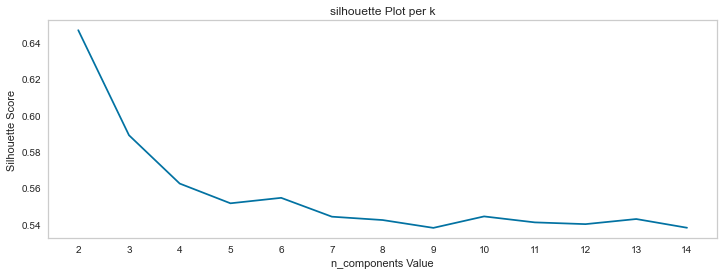

In [100]:
_numOfClusters(data)
""" MEJORA: ANALIZAR SOLO 2 CLUSTERS """
""" MEJORA: LLEVAR DATOS A UNA MISMA ESCALA """

In [101]:
def _kmeansInertia(data, n_clusters=15):
    """ INERCIA DEL MODELO """
    no_of_clusters = range(2,n_clusters)
    inertia = []
    for f in no_of_clusters:
        kmeans = KMeans(n_clusters=f, init="k-means++", max_iter=500, n_init=50) #, random_state=42)
        kmeans = kmeans.fit(data)
        u = kmeans.inertia_
        inertia.append(u)

    plt.figure(figsize=(12,4))
    plt.plot(list(range(1,len(inertia)+1)),inertia)
    plt.xlabel('n_components Value')
    plt.ylabel('Inertia Score')
    plt.title("Inertia Plot per k")
    plt.xticks(list(range(1,n_clusters)), list(range(1,n_clusters)))
    plt.grid()
    plt.savefig("..//out//kmeans_inertia.png")
    #plt.close()

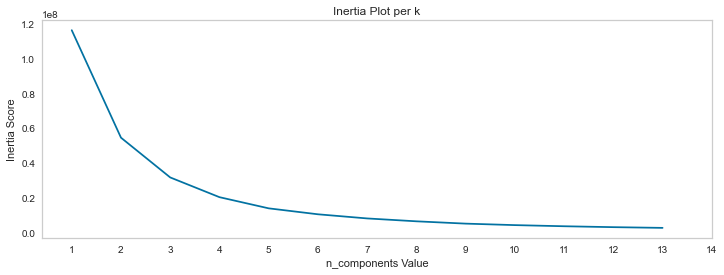

In [102]:
_kmeansInertia(data)
""" MEJORA: ANALIZAR SOLO 2 CLUSTERS """
""" MEJORA: LLEVAR DATOS A UNA MISMA ESCALA """

## KMEANS

Se a determinado que ${4}$ clusters podria ser un buen numero de agrupaciones para este conjunto de datos.

In [103]:
true_k = 4 # Numero de Clusters
model = KMeans(n_clusters=true_k, init="k-means++", max_iter=500, n_init=50, random_state=42) #RANDOM STATE  42
model.fit(data)

""" MEJORA: LLEVAR DATOS A UNA MISMA ESCALA """
labels = model.fit_predict(data)

In [104]:
data.loc[:, 'Label'] = labels
data.loc[:, 'Target'] = target.values.flatten().tolist()

### Guardar Datos

In [105]:
data.to_excel("..//in//Datos_EDA_IMP_WL.xlsx")

# Clustering Analisis

## Se incluyen variables adicionales del paciente para el analisis

In [106]:
data_extended = df[['persistencia', 'tiempo_en_tratamiento_arv', 'numero_de_fracasos',
       'antecedente_fracaso_a. no', 'antecedente_fracaso_b. si','edad','estrato_social',
       'estado_civil','escolaridad']]

data_extended.loc[:, 'Label'] = labels
data_extended.loc[:, 'Target'] = target.values.flatten().tolist()

El análisis de clustering muestra la distribución de las observaciones en dos grupos etiquetados como "Fracaso" y "Éxito", según su pertenencia a cada uno de los cuatro grupos identificados por el algoritmo de clustering. A partir de estos datos, se pueden hacer algunas observaciones:

• La etiqueta 0 tiene la mayor proporción de observaciones clasificadas como "Éxito", mientras que la etiqueta 2 tiene la mayor proporción de observaciones clasificadas como "Fracaso".

• En general, hay más observaciones clasificadas como "Éxito" que como "Fracaso" en cada uno de los grupos identificados por el algoritmo de clustering.

• Las etiquetas 1 y 3 tienen una distribución similar de observaciones entre las categorías "Éxito" y "Fracaso".

• Se puede observar que la distribución de observaciones entre las categorías "Éxito" y "Fracaso" varía notablemente entre las etiquetas, lo que indica que estas etiquetas pueden estar capturando diferentes características o patrones en los datos.

En general, este análisis de clustering proporciona una descripción útil de cómo las observaciones se distribuyen entre las categorías "Éxito" y "Fracaso" dentro de cada uno de los grupos identificados por el algoritmo de clustering, lo que puede ser útil para entender las diferencias entre los grupos y para identificar posibles patrones o tendencias en los datos.

In [107]:
pd.pivot_table(data_extended, index='Label', columns='Target', aggfunc='size', fill_value=0)

Target,Fracaso,Éxito
Label,,
0,185,1286
1,168,981
2,389,1285
3,160,952


Estos estadísticos de la variable persistencia por cada Label pueden proporcionar información valiosa sobre cómo varía la persistencia en cada grupo de etiquetas. Algunas observaciones que se pueden hacer son:

### Persistencia

• La columna "count" indica el número de observaciones que se tienen para cada grupo de etiquetas. En este caso, se observa que el numero de registros se distribuye de manera "uniforme" entre los clusters.

• La columna "mean" muestra el valor promedio de la persistencia para cada grupo de etiquetas. Se puede observar que la persistencia es relativamente alta para todas las etiquetas, pero es ligeramente más baja para la etiqueta 1 y 3 en comparación con las demás etiquetas.

• La columna "std" muestra la desviación estándar de la persistencia para cada grupo de etiquetas. En este caso, la desviación estándar es relativamente baja para todas las etiquetas, lo que indica que la persistencia tiende a estar bastante concentrada en torno a los valores medios.

• Los valores mínimo y máximo (columnas "min" y "max") proporcionan información sobre el rango de valores que se observan para cada etiqueta. En este caso, se puede observar que la persistencia varía desde un mínimo de alrededor del 11% hasta un máximo de alrededor del 100%.

• Los cuartiles (columnas "25%", "50%", y "75%") proporcionan información sobre cómo se distribuyen los datos en cada grupo de etiquetas. Por ejemplo, se puede observar que el 50% de las observaciones en la etiqueta 1 tienen una persistencia de al menos 0.94, mientras que el 25% de las observaciones tienen una persistencia de al menos 0.80.

En general, estos estadísticos proporcionan una buena descripción de cómo varía la persistencia en cada grupo de etiquetas, lo que puede ser útil para entender las características distintivas de cada etiqueta y para identificar posibles patrones o tendencias en los datos.


### Tiempo en tratamiento arv

Estos datos nos muestran que hay una variación significativa en el tiempo en tratamiento entre los diferentes grupos de pacientes, y que esta variable puede ser importante para predecir el fracaso virológico.

In [108]:
data.groupby('Label').describe()[['persistencia','tiempo_en_tratamiento_arv','numero_de_fracasos']].T

Label                                      0            1            2  \
persistencia              count  1471.000000  1149.000000  1674.000000   
                          mean      0.907913     0.860979     0.943784   
                          std       0.138834     0.186153     0.104883   
                          min       0.148148     0.161290     0.241935   
                          25%       0.870712     0.805687     0.937500   
                          50%       0.969828     0.944882     0.991736   
                          75%       1.000000     0.996016     1.000000   
                          max       1.004184     1.003861     1.004184   
tiempo_en_tratamiento_arv count  1471.000000  1149.000000  1674.000000   
                          mean    559.161795   834.491732   315.802867   
                          std      73.982437    77.638968    75.857217   
                          min     438.000000   700.000000   155.000000   
                          25%     492.000000   766.000000   256.000000   
                          50%     557.000000   836.000000   323.000000   
                          75%     622.000000   904.000000   381.000000   
                          max     696.000000   963.000000   437.000000   
numero_de_fracasos        count  1471.000000  1149.000000  1674.000000   
                          mean      0.556084     0.637946     0.459379   
                          std       0.881064     1.004947     0.661348   
                          min       0.000000     0.000000     0.000000   
                          25%       0.000000     0.000000     0.000000   
                          50%       0.000000     0.000000     0.000000   
                          75%       1.000000     1.000000     1.000000   
                          max       7.000000     6.000000     5.000000   

Label                                      3  
persistencia              count  1112.000000  
                          mean      0.853751  
                          std       0.186456  
                          min       0.114943  
                          25%       0.784747  
                          50%       0.930466  
                          75%       0.993431  
                          max       1.004057  
tiempo_en_tratamiento_arv count  1112.000000  
                          mean   1095.024281  
                          std      79.320212  
                          min     965.000000  
                          25%    1025.000000  
                          50%    1093.000000  
                          75%    1158.250000  
                          max    1243.000000  
numero_de_fracasos        count  1112.000000  
                          mean      0.719424  
                          std       1.108214  
                          min       0.000000  
                          25%       0.000000  
                          50%       0.000000  
                          75%       1.000000  
                          max       7.000000

### Edad

En términos generales, la media de cada grupo es similar, oscilando entre 34.2 y 35.4. Sin embargo, el rango de valores es bastante amplio, con el valor mínimo oscilando entre 1 y 17, mientras que el valor máximo oscila entre 70 y 80.

In [109]:
data_extended.groupby('Label').edad.describe().T

Label,0,1,2,3
count,1471.000000,1149.000000,1674.000000,1112.000000
mean,34.811693,34.441253,35.359618,34.213129
std,11.414957,10.186471,12.033464,9.939895
min,1.000000,17.000000,1.000000,2.000000
25%,27.000000,27.000000,26.000000,27.000000
50%,32.000000,32.000000,32.000000,31.500000
75%,40.000000,40.000000,42.000000,38.000000
max,78.000000,80.000000,77.000000,70.000000


### Estrato social

En este conjunto de datos se está analizando el comportamiento de cada Label (Cluster) según el estrato social de los pacientes y si han tenido éxito o fracaso en su tratamiento antirretroviral (TAR).

Se puede observar que en general los pacientes de estratos sociales más bajos (1 y 2) tienen una mayor proporción de fracasos en comparación con los pacientes de estratos más altos (3, 4 y 5), independientemente del Label. Además, los pacientes de estrato 3 tienen la mayor proporción de éxitos en comparación con los otros estratos.

En cuanto a los Label, se puede notar que en todos los estratos hay una mayor cantidad de pacientes que han tenido éxito en su tratamiento antirretroviral (TAR) que pacientes que han fracasado. En general, el Label 2 tiene la mayor proporción de fracasos en comparación con los otros Label, mientras que el Label 3 tiene la mayor proporción de éxitos.

En resumen, se podría pensar en estrategias y medidas de intervención personalizadas según el estrato social de cada paciente, especialmente en los estratos más bajos, y también según su respectivo Label, ya que cada uno presenta un comportamiento particular.

In [110]:
pd.pivot_table(data_extended, index=['estrato_social', 'Target'], columns='Label', aggfunc='size', fill_value=0)

Label                     0    1    2    3
estrato_social Target                     
1              Fracaso    8    6   23    5
               Éxito     46   35   43   31
2              Fracaso   50   49  101   40
               Éxito    273  244  253  190
3              Fracaso  103   98  213  102
               Éxito    749  548  776  598
4              Fracaso   20   11   39    8
               Éxito    170  110  160   99
5              Fracaso    3    3   10    4
               Éxito     40   37   45   24
6              Fracaso    1    1    3    1
               Éxito      8    7    8   10

### Antecedente fracaso

En el conjunto de datos proporcionado, se pueden observar algunos patrones interesantes en el comportamiento de cada label (cluster), según la proporción de casos de éxito y fracaso en cada uno de ellos:

• Label 0: Este grupo tiene una proporción relativamente alta de casos de fracaso (185) en comparación con el número de casos de éxito (377). Además, la mayoría de los pacientes en este grupo tienen antecedentes de fracaso previo en el tratamiento antirretroviral (antecedente_fracaso_b. si). Esto sugiere que puede haber una correlación entre la persistencia del fracaso en el tratamiento y la pertenencia a este grupo.

• Label 1: Este grupo parece tener una proporción de casos de éxito y fracaso similar a la proporción general en la muestra. La mayoría de los pacientes en este grupo no tienen antecedentes de fracaso previo en el tratamiento antirretroviral (antecedente_fracaso_a. no), lo que sugiere que este grupo podría estar compuesto por pacientes que están comenzando el tratamiento o que han tenido un éxito continuo en el tratamiento sin episodios de fracaso previo.

• Label 2: Este grupo tiene una proporción relativamente alta de casos de éxito (1285) en comparación con el número de casos de fracaso (389). La mayoría de los pacientes en este grupo no tienen antecedentes de fracaso previo en el tratamiento antirretroviral (antecedente_fracaso_a. no), lo que sugiere que este grupo podría estar compuesto por pacientes que están respondiendo bien al tratamiento y que no han tenido problemas anteriores con el mismo.

• Label 3: Este grupo parece tener una proporción de casos de éxito y fracaso similar a la proporción general en la muestra. Al igual que en el grupo Label 1, la mayoría de los pacientes en este grupo no tienen antecedentes de fracaso previo en el tratamiento antirretroviral (antecedente_fracaso_a. no), lo que sugiere que este grupo podría estar compuesto por pacientes que están comenzando el tratamiento o que han tenido un éxito continuo en el tratamiento sin episodios de fracaso previo.

En general, estos resultados sugieren que hay diferencias en el comportamiento de los pacientes en cada uno de los grupos identificados por el análisis de clustering. Estos patrones pueden ser útiles para desarrollar medidas preventivas y estrategias de intervención específicas para cada grupo de pacientes, con el objetivo de mejorar el éxito del tratamiento antirretroviral y reducir el riesgo de fracaso.

In [111]:
pd.pivot_table(data_extended, index=['antecedente_fracaso_a. no', 'antecedente_fracaso_b. si','Target'], columns='Label', aggfunc='size', fill_value=0)

Label                                                          0    1     2  \
antecedente_fracaso_a. no antecedente_fracaso_b. si Target                    
0                         1                         Fracaso  185  168   389   
                                                    Éxito    377  287   250   
1                         0                         Éxito    909  694  1035   

Label                                                          3  
antecedente_fracaso_a. no antecedente_fracaso_b. si Target        
0                         1                         Fracaso  160  
                                                    Éxito    305  
1                         0                         Éxito    647

### Comorbilidades

Los datos muestran la distribución de los pacientes en cada cluster (label) según si tienen o no comorbilidades y si alcanzaron o no el éxito en el tratamiento.

En general, se puede observar que la mayoría de los pacientes en cada cluster no tienen comorbilidades. En cuanto a los resultados del tratamiento, los pacientes que no tienen comorbilidades tienen una mayor probabilidad de alcanzar el éxito en el tratamiento en todos los clusters, lo cual puede indicar que las comorbilidades pueden tener un efecto negativo en el éxito del tratamiento.

Sin embargo, también se puede observar que en algunos clusters, la diferencia en la tasa de éxito entre los pacientes con y sin comorbilidades es más pequeña. Esto sugiere que en algunos clusters, la presencia de comorbilidades puede tener un efecto menor en el éxito del tratamiento, y que otras variables (como la adherencia al tratamiento) pueden ser más importantes.

En resumen, estos datos sugieren que la presencia de comorbilidades puede influir en el éxito del tratamiento del VIH, y que es importante considerar esta variable al tomar decisiones sobre el tratamiento de pacientes con VIH.

In [112]:
comorbilidades = df_aux[['Aspergilosis', 'Micosis', 'Candidiasis',
       'CMV', 'Enteritis', 'Herpes', 'Histoplasmosis', 'Sarcoma_Kaposi',
       'Linfoma_carcinoma', 'Nocardiosis', 'Encefalitis', 'Neumonia',
       'Toxoplasmosis', 'Tuberculosis', 'Hepatitis_viral', 'varicela']]

def es_comorbilidad(val):
    if val == 'a. No':
        return False
    elif val == 'b. Si':
        return True
    else:
        return val
    
comorbilidades_bool = comorbilidades.applymap(es_comorbilidad)
tiene_comorbilidad = comorbilidades_bool.any(axis=1)

In [113]:
data_extended.loc[:, 'tiene_comorbilidad'] = tiene_comorbilidad.values

In [114]:
pd.pivot_table(data_extended, index=['tiene_comorbilidad','Target'], columns='Label', aggfunc='size', fill_value=0)

Label                         0    1     2    3
tiene_comorbilidad Target                      
False              Fracaso  132  123   297  123
                   Éxito    974  777  1017  781
True               Fracaso   53   45    92   37
                   Éxito    312  204   268  171

### Se guarda conjunto de datos filtrado a seis meses (tiempo_en_tratamiento_arv)

In [115]:
data_save = data.copy(deep=True)
data_save.loc[:, 'tiempo_en_tratamiento_arv_meses'] = (data_save['tiempo_en_tratamiento_arv'] / 30)
data_save.loc[:, 'Target'] = data_extended['Target'] 
data_save[data_save['tiempo_en_tratamiento_arv_meses'] <= 6.0].to_excel("..//in//Datos_EDA_IMP_WL_TM.xlsx")

## Graficas

In [116]:
data.drop(['Label','Target'], inplace=True, axis=1)

In [117]:
def _graph2DCluster(labels, data, names, size=25):
        """ GRAFICA  2D """
        """ MEJORA: ESTANDARIZAR LOS DATOS ANTES """
        pca = PCA(n_components=2)
        scatter_plot_points = pca.fit_transform(data)
        #_graphPCA(pca)
        x_axis = [o[0] for o in scatter_plot_points]
        y_axis = [o[1] for o in scatter_plot_points]
        fig = px.scatter(x=x_axis, y=y_axis, color=labels, size=[size]*len(x_axis), hover_name=names, width = 800, height = 600)
        fig.show()
        fig.write_html("..//out//clusters2D.html")

In [118]:
_graph2DCluster(labels, data, target.values.flatten(), size=10)

In [119]:
def _graph3DCluster(data, labels, names):
        """ GRAFICA  3D """
        """ MEJORA: ESTANDARIZAR LOS DATOS ANTES """

        pca = PCA(n_components=3)
        scatter_plot_points = pca.fit_transform(data)

        x_axis = [o[0] for o in scatter_plot_points]
        y_axis = [o[1] for o in scatter_plot_points]
        z_axis = [o[2] for o in scatter_plot_points]

        df = pd.DataFrame()
        df['X'] = x_axis
        df['Y'] = y_axis
        df['Z'] = z_axis
        df['C'] = labels
        df['name'] = names

        fig = px.scatter_3d(df, x='X', y='Y', z='Z',
                      color='C', hover_name=names)
        fig.show()
        fig.write_html("..//out//clusters3D.html")

In [120]:
_graph3DCluster(data, labels, target.values.flatten())

# Otros análisis 

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=500, n_clusters=4, n_init=50))

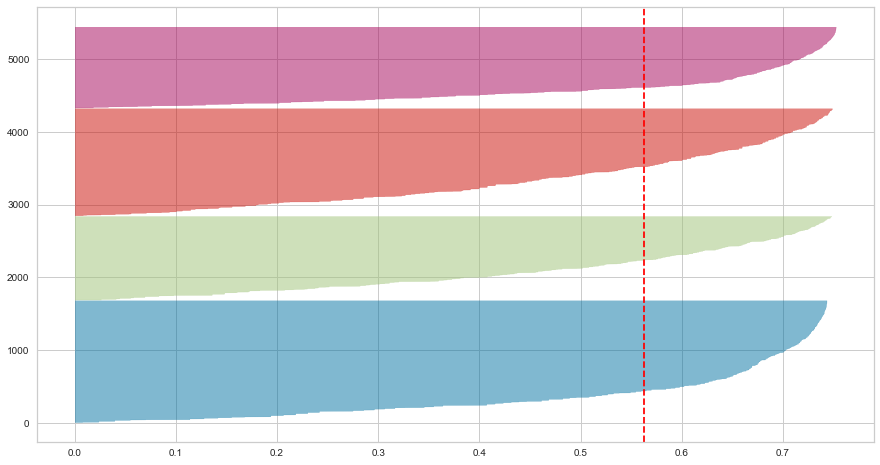

In [121]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4, init="k-means++", max_iter=500, n_init=50) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data)

In [124]:
def _graphPCA(pca):
    plt.figure(figsize=(20,6))
    features = range(pca.n_components_+1)
    print(pca.explained_variance_ratio_)
    print(np.cumsum(pca.explained_variance_ratio_))
    plt.bar(np.arange(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('PCA Feature')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio (PCA)')
    plt.xticks(features)
    plt.grid()
    plt.savefig("..//out//PCA.png")
    plt.show()
    #plt.close()